In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC


X_train = pd.read_csv('Human_Activity_Recognition/train/X_train.txt', sep=' ', header=None)
y_train = pd.read_csv('Human_Activity_Recognition/train/y_train.txt', sep=' ', header=None)

X_test = pd.read_csv('Human_Activity_Recognition/test/X_test.txt', sep=' ', header=None)
y_test = pd.read_csv('Human_Activity_Recognition/test/y_test.txt', sep=' ', header=None)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train

,0,1,2,3,4,5,6,7,8,9
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469
...,...,...,...,...,...,...,...,...,...,...
1995,0.239866,-0.016819,-0.127938,-0.479384,-0.167162,-0.520564,-0.508147,-0.183497,-0.483609,-0.435364
1996,0.234524,-0.010957,-0.099738,-0.500860,-0.167850,-0.508214,-0.537495,-0.191106,-0.469048,-0.435364
1997,0.212202,-0.009611,-0.058073,-0.487049,-0.174565,-0.463627,-0.524110,-0.172802,-0.435630,-0.457439
1998,0.273924,0.016351,-0.082030,-0.480790,-0.088519,-0.466508,-0.506083,-0.113374,-0.438114,-0.457439


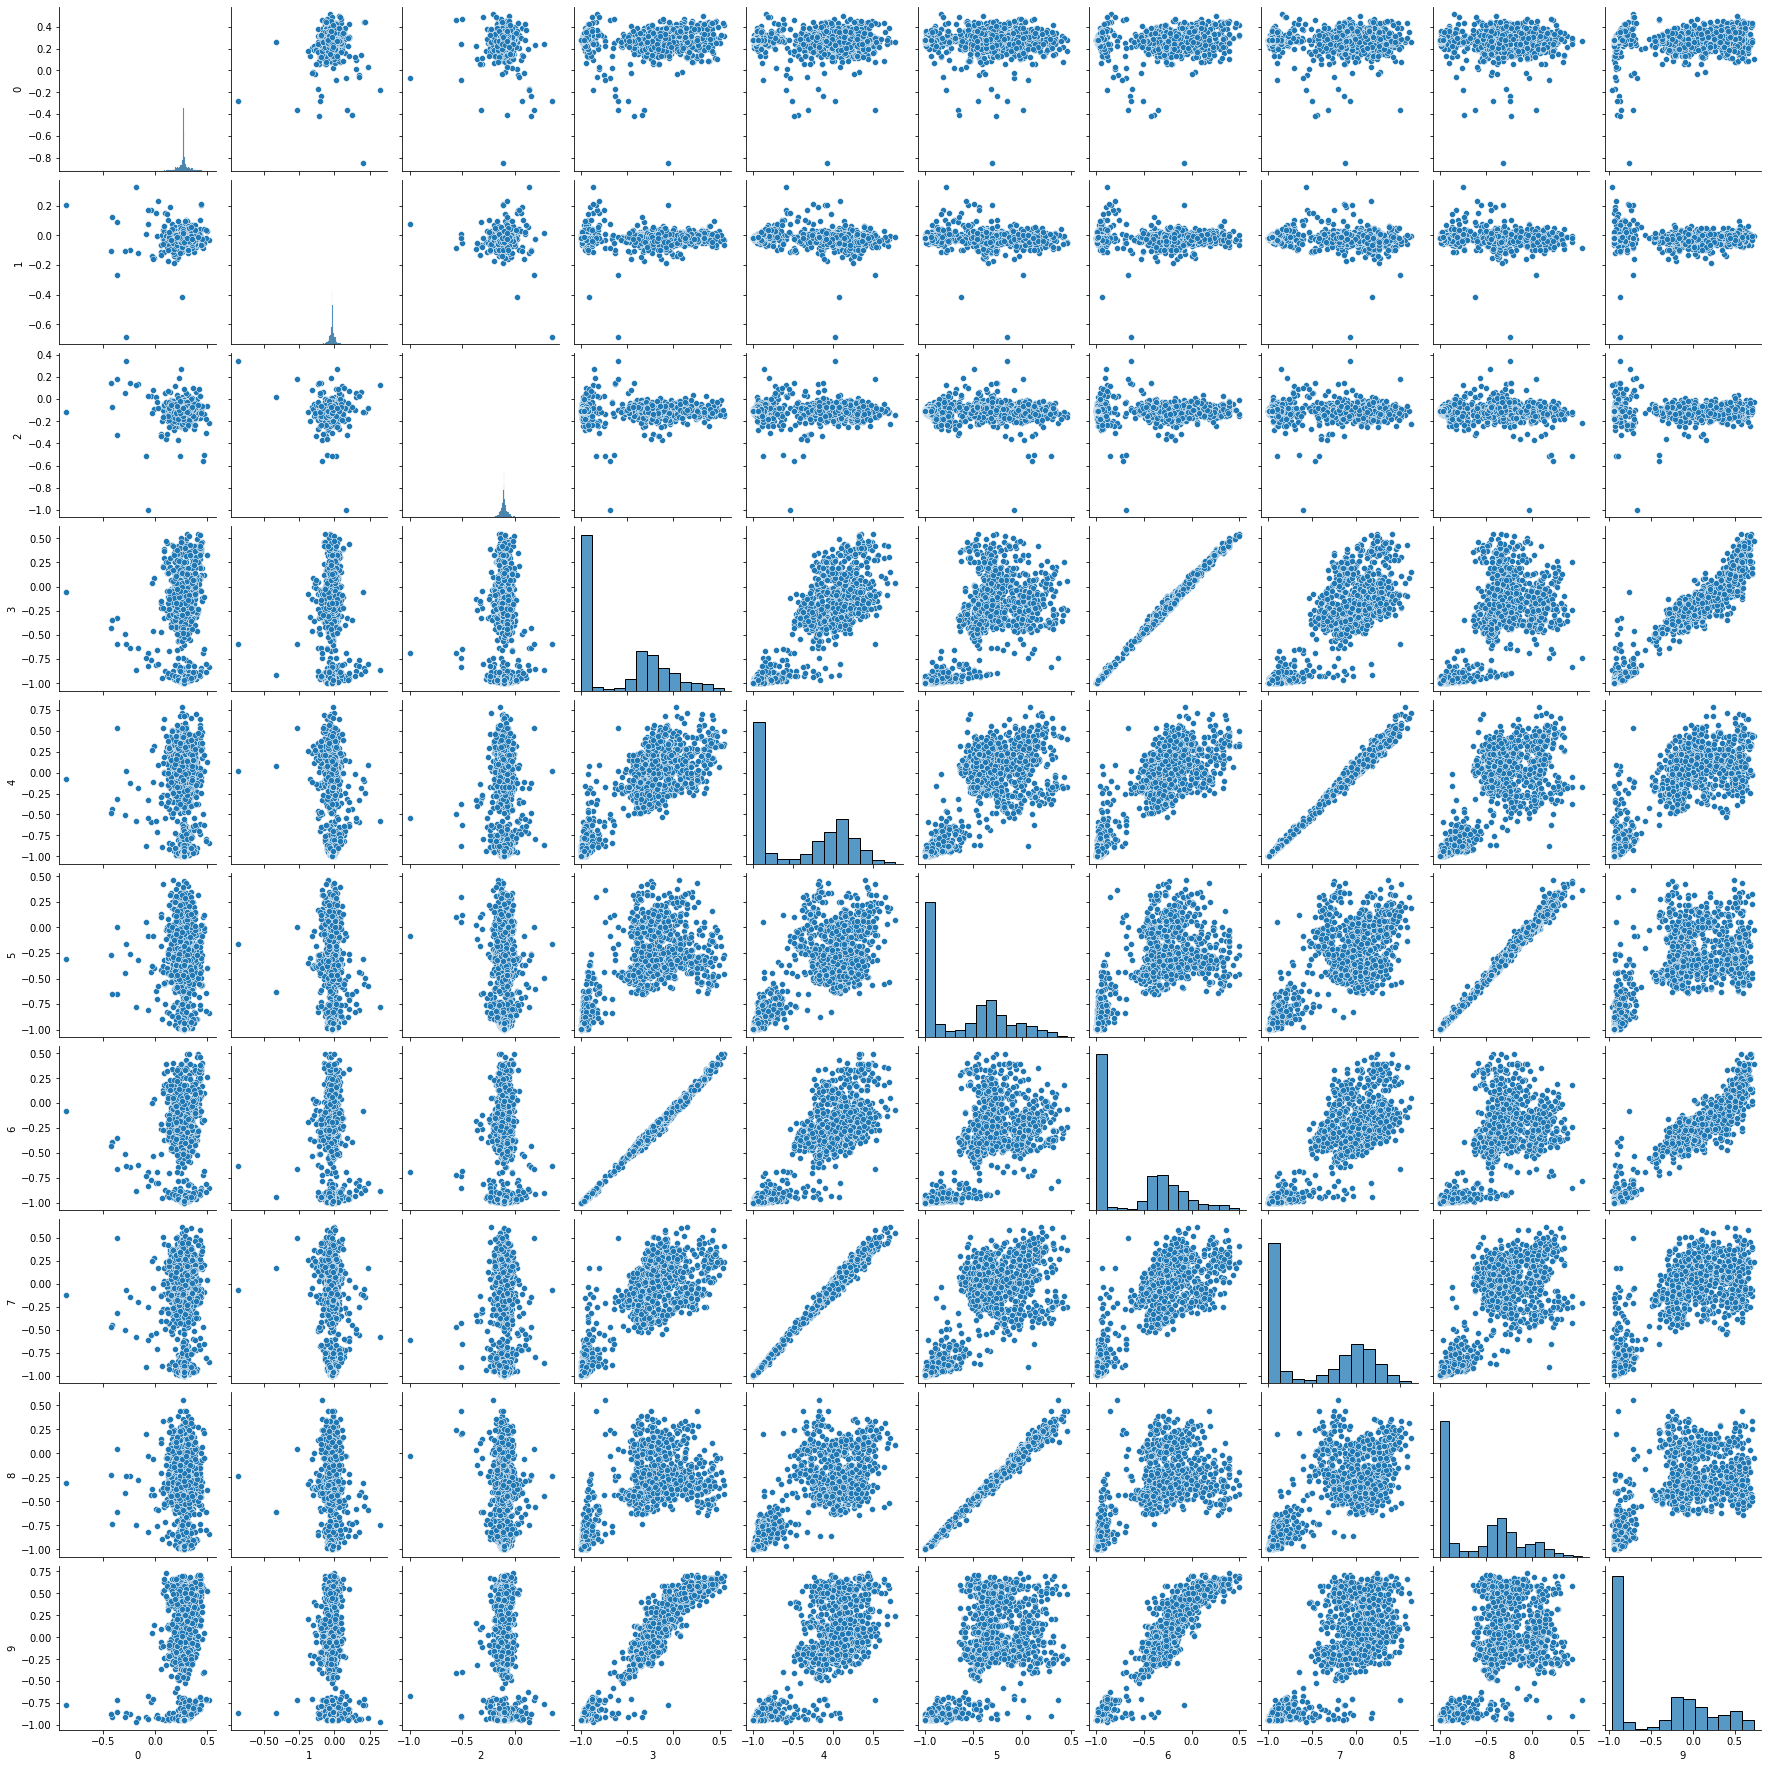

In [2]:
sns.pairplot(X_train)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit(X_train)

print(X_pca.explained_variance_ratio_)
print(X_pca.singular_values_)

[0.91322256 0.04647453]
[52.94657616 11.94420017]


In [16]:
pca_scaled = pca.fit(X_train_scaled)

print(pca_scaled.explained_variance_ratio_)
print(pca_scaled.singular_values_)

[0.63973289 0.11003893]
[113.11347333  46.91245646]


در حالت اسکیل‌نشده جزء اول مقدار بیشتری از اطلاعات را نمایندگی می‌کند.

In [19]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [7]:
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Model without LDA:

In [9]:

model = SVC()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         1.0       0.58      0.70      0.64       186
         2.0       0.50      0.38      0.44       149
         3.0       0.98      0.96      0.97       134
         4.0       0.80      0.05      0.09       170
         5.0       0.56      0.27      0.37       178
         6.0       0.40      0.95      0.56       183

    accuracy                           0.55      1000
   macro avg       0.64      0.55      0.51      1000
weighted avg       0.62      0.55      0.50      1000



### Model with LDA:

In [12]:
model_lda = SVC()
model_lda.fit(X_train_lda, y_train)
y_predict_lda = model_lda.predict(X_test_lda)

print(classification_report(y_test, y_predict_lda))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

         1.0       0.71      0.70      0.71       186
         2.0       0.57      0.54      0.56       149
         3.0       0.88      0.94      0.91       134
         4.0       0.71      0.06      0.11       170
         5.0       0.53      0.65      0.58       178
         6.0       0.52      0.84      0.64       183

    accuracy                           0.62      1000
   macro avg       0.65      0.62      0.58      1000
weighted avg       0.65      0.62      0.58      1000



### Model with PCA:

In [20]:
model_pca = SVC()
model_pca.fit(X_train_pca, y_train)
y_predict_pca = model_pca.predict(X_test_pca)

print(classification_report(y_test, y_predict_pca))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

         1.0       0.53      0.99      0.69       186
         2.0       0.29      0.01      0.03       149
         3.0       0.97      0.84      0.90       134
         4.0       0.88      0.04      0.08       170
         5.0       0.60      0.27      0.37       178
         6.0       0.40      0.95      0.56       183

    accuracy                           0.53      1000
   macro avg       0.61      0.52      0.44      1000
weighted avg       0.60      0.53      0.43      1000



### Model with scaled PCA:

In [21]:
X_train_sc_pca = pca.fit_transform(X_train_scaled)
X_test_sc_pca = pca.transform(X_test_scaled)

model_sc_pca = SVC()
model_sc_pca.fit(X_train_sc_pca, y_train)
y_predict_sc_pca = model_pca.predict(X_test_sc_pca)

print(classification_report(y_test, y_predict_sc_pca))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

         1.0       0.64      0.37      0.47       186
         2.0       0.44      0.11      0.18       149
         3.0       0.35      0.86      0.49       134
         4.0       0.33      0.54      0.41       170
         5.0       0.25      0.02      0.03       178
         6.0       0.30      0.38      0.33       183

    accuracy                           0.36      1000
   macro avg       0.38      0.38      0.32      1000
weighted avg       0.39      0.36      0.32      1000

